In [1]:
from app import predict  
from PIL import Image, ImageDraw
import numpy as np
import pickle
from IPython.display import display

# Маски опасной зоны 
with open('line_masks.p' , 'rb') as f: 
    line_masks = pickle.load(f)

Using cache found in /home/mark/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-9 Python-3.9.7 torch-1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1080, 8118MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [2]:
# Пример безопасной ситуации  
#file = 'test_images/oz_frame548.jpg'
#out = predict(file)
#len(out)

In [3]:
# Пример опасной ситуации
file = 'test_images/am3_9_violation_frame085.jpg'
out = predict(file)
len(out)

3

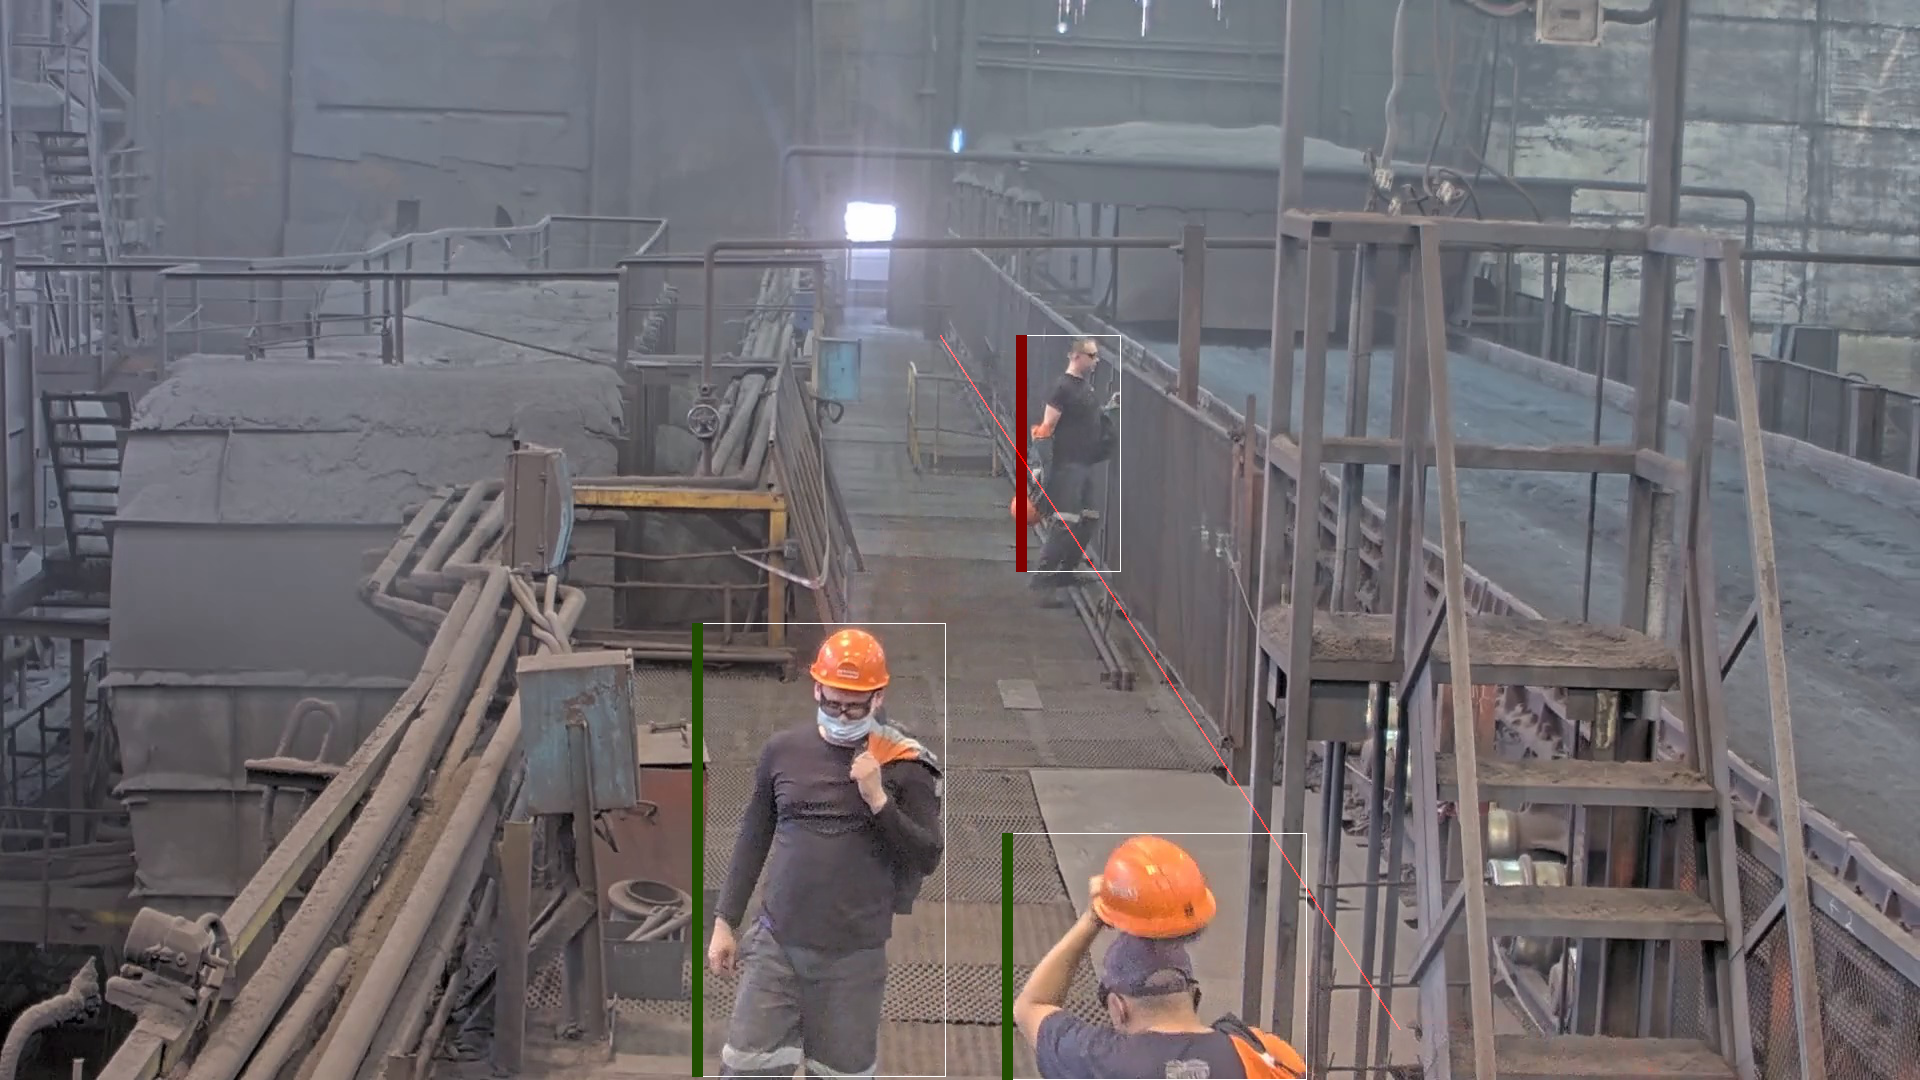

In [4]:
# Отрисовка примера 
# Жирной красной полосой выделены опасные моменты 
img = Image.open(file)

for data in out: 

    violation = data['violation']
    bbox = data['bbox']
    camera_id = data['camera_id']
    
    draw = ImageDraw.Draw(img)
    draw.rectangle(bbox, fill= None)
    
    if violation: # дорисовка красной полосы 
        draw = ImageDraw.Draw(img)
        bbox = bbox[0] - 10, bbox[1],bbox[0],bbox[3]
        draw.rectangle(bbox, fill=128)
    else:
        draw = ImageDraw.Draw(img)
        bbox = bbox[0] - 10, bbox[1],bbox[0],bbox[3]
        draw.rectangle(bbox, fill= 20000)        
    
    
    # ограничительная линия 
    line_mask = line_masks[camera_id]['mask'] 
    img_np = np.array(img)
    img_np[line_mask,0] = 255
    
    im = Image.fromarray(img_np)

display(im)
#break